# Project 2

Name: Anisul Arman

Course_ID: IS 362 Data Acquisition and Management . 

### Description

Your task is to:
(1) Choose any three of the “wide” datasets identified in the Week 5 Discussion items. (You may use your own dataset; please don’t use my Sample Post dataset, since that was used in your Project 1 assignment!) For each of the three chosen datasets:

• Create a .CSV file (or optionally, a MySQL database!) that includes all of the information included in the dataset. You’re encouraged to use a “wide” structure similar to 
how the information appears in the discussion item, so that you can practice tidying and transformations as described below.

• Read the information from your .CSV file into Python, and use pandas as needed to tidy and transform your data. [Most of your grade will be based on this step!]

• Perform the analysis requested in the discussion item.

• Your code should be in an Jupyter Notebook, posted to your GitHub repository, and should include narrative descriptions of your data cleanup work, analysis, and conclusions.

In [203]:
# import all the neccesary libraries
import pandas as pd

## List of countries by population in 2010

One example of an untidy dataset I found is the "List of countries by population in 2010" from Wikipedia. The data set presents population figures and other variables such as area and population density. The data is structured in a wide format and each variable occupies its own column. This structure can make it challenging to perform analyses that require a long format, where each observation is a single row.

To better analyze the relationship between population density and total population across different countries, it would be beneficial to restructure this dataset into a tidy format. In a tidy dataset, each variable forms a column, each observation forms a row, and each type of observational unit forms a table. By changing the data into this structure, one could easily create visualizations to explore how population density correlates with total population.

Source: https://en.wikipedia.org/wiki/List_of_countries_by_population_in_2010 

In [204]:
pop_2010_df = pd.read_csv('List_of_countries_by_population_in_2010.csv',encoding='latin-1', delimiter=',')
pop_2010_df.head()

,Rank,Country / territory,Population2010(OECD estimate),Changefrom 2005*,Area (km2)[1],Populationdensity(peopleper km2)
0,,World,6843522711,NaN,NaN,NaN
1,1,China,1339724852,NaN,9596961.0,140.0
2,2,India,1182105564,NaN,3287263.0,360.0
3,3,United States,309349689,NaN,9833520.0,31.0
4,4,Indonesia,237641326,NaN,1904569.0,125.0


In [205]:
pop_2010_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Rank                              199 non-null    object 
 1   Country / territory               199 non-null    object 
 2   Population2010(OECD estimate)     199 non-null    int64  
 3   Changefrom 2005*                  98 non-null     float64
 4   Area (km2)[1]                     156 non-null    float64
 5   Populationdensity(peopleper km2)  198 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB


In [206]:
# Rename columns name
pop_2010_df = pop_2010_df.rename(columns={
    'Rank': 'Rank',
    'Country / territory': 'Country',
    'Population2010(OECD estimate)': 'Population_2010',
    'Changefrom 2005': 'Change_from_2005',
    'Area (km2)[1]': 'Area_km2',
    'Populationdensity(peopleper km2)': 'Population_Density'
})

pop_2010_df.columns

Index(['Rank', 'Country', 'Population_2010', 'Changefrom 2005*', 'Area_km2',
       'Population_Density'],
      dtype='object')

In [207]:
pop_2010_df.head()

,Rank,Country,Population_2010,Changefrom 2005*,Area_km2,Population_Density
0,,World,6843522711,NaN,NaN,NaN
1,1,China,1339724852,NaN,9596961.0,140.0
2,2,India,1182105564,NaN,3287263.0,360.0
3,3,United States,309349689,NaN,9833520.0,31.0
4,4,Indonesia,237641326,NaN,1904569.0,125.0


In [208]:
# Drop the top row, that is the total population
pop_2010_df = pop_2010_df.loc[1:].reset_index(drop=True)
pop_2010_df.head()

,Rank,Country,Population_2010,Changefrom 2005*,Area_km2,Population_Density
0,1,China,1339724852,NaN,9596961.0,140.0
1,2,India,1182105564,NaN,3287263.0,360.0
2,3,United States,309349689,NaN,9833520.0,31.0
3,4,Indonesia,237641326,NaN,1904569.0,125.0
4,5,Brazil,193252604,NaN,8515767.0,23.0


In [209]:
# Ensure numerical columns are in the correct format
pop_2010_df['Population_2010'] = pd.to_numeric(pop_2010_df['Population_2010'], errors='coerce')
pop_2010_df['Population_Density'] = pd.to_numeric(pop_2010_df['Population_Density'], errors='coerce')
pop_2010_df['Area (km2)'] = pd.to_numeric(pop_2010_df['Area_km2'], errors='coerce')

# Display the cleaned DataFrame
pop_2010_df.head()

,Rank,Country,Population_2010,Changefrom 2005*,Area_km2,Population_Density,Area (km2)
0,1,China,1339724852,NaN,9596961.0,140.0,9596961.0
1,2,India,1182105564,NaN,3287263.0,360.0,3287263.0
2,3,United States,309349689,NaN,9833520.0,31.0,9833520.0
3,4,Indonesia,237641326,NaN,1904569.0,125.0,1904569.0
4,5,Brazil,193252604,NaN,8515767.0,23.0,8515767.0


# Perform Analysis

To better analyze the relationship between population density and total population across different countries, it would be beneficial to restructure this dataset into a tidy format. In a tidy dataset, each variable forms a column, each observation forms a row, and each type of observational unit forms a table. By changing the data into this structure, one could easily create visualizations to explore how population density correlates with total population.

In [210]:
# Summary statistics
pop_2010_df[['Population_2010', 'Population_Density']].describe()

,Population_2010,Population_Density
count,1.980000e+02,198.000000
mean,3.455954e+07,64.328283
std,1.310964e+08,507.544490
min,1.008350e+05,0.000000
25%,1.712259e+06,0.000000
50%,7.157818e+06,0.000000
75%,2.296971e+07,0.000000
max,1.339725e+09,7036.000000


In [211]:
# Correlation between population and density
correlation = pop_2010_df[['Population_2010', 'Population_Density']].corr()
correlation

,Population_2010,Population_Density
Population_2010,1.000000,0.054532
Population_Density,0.054532,1.000000


<Axes: title={'center': 'Population vs Population Density'}, xlabel='Total Population', ylabel='Population Density'>

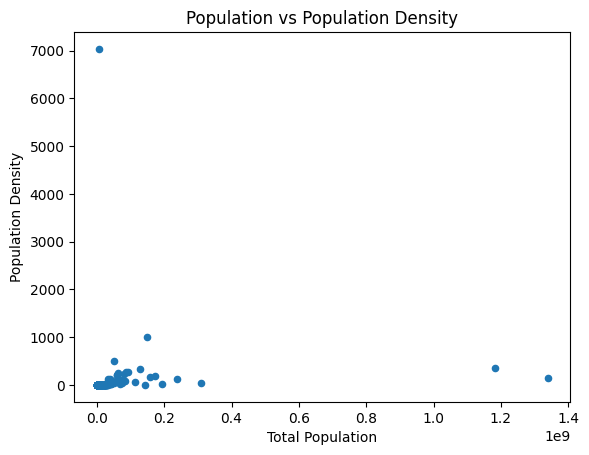

In [212]:
# Population vs Population Density

pop_2010_df.plot(
    kind='scatter',
    x='Population_2010',
    y='Population_Density',
    title='Population vs Population Density',
    xlabel='Total Population',
    ylabel='Population Density',
)

<Axes: title={'center': 'Top 10 Most Densely Populated Countries (2010)'}, xlabel='Country', ylabel='Population Density'>

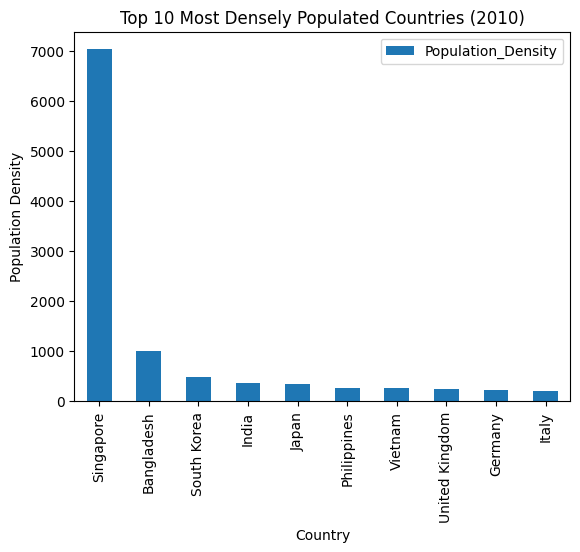

In [213]:
#  Top 10 Most Densely Populated Countries
top_dense = pop_2010_df.sort_values(by='Population_Density', ascending=False).head(10)

top_dense.plot(
    kind='bar',
    x='Country',
    y='Population_Density',
    title='Top 10 Most Densely Populated Countries (2010)',
    xlabel='Country',
    ylabel='Population Density',
)

## Messy IMDB dataset

The dataset I chose is Messy IMDB dataset from kaggle.com. It is a list of 100 movies and provides details such as actor, director, and budget. The data is untidy for multiple reasons, including poorly named columns, missing values, and inconsistent formats. Trend and correlation analysis might be performed on the data to identify genre trends or correlations between factors like ratings and budget.    

In [214]:
# read the data
df_imdb = pd.read_csv('messy_IMDB_dataset.csv', encoding='latin-1', delimiter=';')
df_imdb.head(10)

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f"
5,tt0167260,The Lord of the Rings: The Return of the King,22 Feb 04,"Action, Adventure, Drama",201,New Zealand,PG-13,Peter Jackson,NaN,$ 1142271098,1.604.280,08.9
6,tt0108052,Schindler's List,1994-03-11,"Biography, Drama, History",Nan,USA,R,Steven Spielberg,NaN,$ 322287794,1.183.248,8.9
7,tt0050083,12 Angry Men,1957-09-04,"Crime, Drama",96,USA,Not Rated,Sidney Lumet,NaN,$ 576,668.473,8.9
8,tt1375666,Inception,2010-09-24,"Action, Adventure, Sci-Fi",148,USA,PG-13,Christopher Nolan,NaN,$ 869784991,2.002.816,8..8
9,tt0137523,Fight Club,10-29-99,Drama,Inf,UK,R,David Fincher,NaN,$ 101218804,1.807.440,8.8


In [215]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMBD title ID   100 non-null    object 
 1   Original titlÊ  100 non-null    object 
 2   Release year    100 non-null    object 
 3   Genrë¨          100 non-null    object 
 4   Duration        99 non-null     object 
 5   Country         100 non-null    object 
 6   Content Rating  77 non-null     object 
 7   Director        100 non-null    object 
 8   Unnamed: 8      0 non-null      float64
 9   Income          100 non-null    object 
 10   Votes          100 non-null    object 
 11  Score           100 non-null    object 
dtypes: float64(1), object(11)
memory usage: 9.6+ KB


In [216]:
# see the columns before renaming it
df_imdb.columns

Index(['IMBD title ID', 'Original titlÊ', 'Release year', 'Genrë¨', 'Duration',
       'Country', 'Content Rating', 'Director', 'Unnamed: 8', 'Income',
       ' Votes ', 'Score'],
      dtype='object')

### tidy and transform data

In [217]:
# Remove extra spaces in column names
df_imdb.columns = df_imdb.columns.str.strip()

In [218]:
# Rename columns to clear names
df_imdb.rename(columns={
    'IMBD title ID': 'imdb_id',
    'Original titlÊ': 'title',
    'Release year': 'release_date',
    'Genrë¨': 'genre',
    'Duration': 'duration',
    'Country': 'country',
    'Content Rating': 'content_rating',
    'Director': 'director',
    'Income': 'income',
    'Votes': 'votes',
    'Score': 'score'
}, inplace=True)

# Remove the unwanted column (if it exists)
df_imdb.drop(columns=['Unnamed: 8'], errors='ignore', inplace=True)

In [219]:
# Clean 'income' column (remove symbols and letters, keep only numbers)
df_imdb['income'] = df_imdb['income'].astype(str).str.replace('[\$,]', '', regex=True) 
df_imdb['income'] = df_imdb['income'].str.replace('[^\d]', '', regex=True)
df_imdb['income'] = pd.to_numeric(df_imdb['income'], errors='coerce')  

# Show the cleaned data
df_imdb.head()

,imdb_id,title,release_date,genre,duration,country,content_rating,director,income,votes,score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,2.881524e+07,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,2.461210e+08,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,1.005455e+09,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,4.803578e+07,1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,2.228318e+08,1.780.147,"8,9f"


In [220]:
# Convert 'release_date' to a proper date format and get the year
df_imdb['release_date'] = pd.to_datetime(df_imdb['release_date'], errors='coerce')
df_imdb['release_year'] = df_imdb['release_date'].dt.year

# Show the cleaned data
df_imdb.head()

,imdb_id,title,release_date,genre,duration,country,content_rating,director,income,votes,score,release_year
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,2.881524e+07,2.278.845,9.3,1995.0
1,tt0068646,The Godfather,NaT,"Crime, Drama",175,USA,R,Francis Ford Coppola,2.461210e+08,1.572.674,9.2,NaN
2,tt0468569,The Dark Knight,NaT,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,1.005455e+09,2.241.615,9.,NaN
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,4.803578e+07,1.098.714,"9,.0",1975.0
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,2.228318e+08,1.780.147,"8,9f",1994.0


In [221]:
# Clean 'votes' column (remove dots, keep only numbers)
df_imdb['votes'] = df_imdb['votes'].astype(str).str.replace('[^\d]', '', regex=True)
df_imdb['votes'] = pd.to_numeric(df_imdb['votes'], errors='coerce')  

# Show the cleaned data
df_imdb.head()

,imdb_id,title,release_date,genre,duration,country,content_rating,director,income,votes,score,release_year
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,2.881524e+07,2278845.0,9.3,1995.0
1,tt0068646,The Godfather,NaT,"Crime, Drama",175,USA,R,Francis Ford Coppola,2.461210e+08,1572674.0,9.2,NaN
2,tt0468569,The Dark Knight,NaT,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,1.005455e+09,2241615.0,9.,NaN
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,4.803578e+07,1098714.0,"9,.0",1975.0
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,2.228318e+08,1780147.0,"8,9f",1994.0


In [222]:
# Convert 'score' to number (change commas to dots)
df_imdb['score'] = df_imdb['score'].astype(str).str.replace(',', '.')
df_imdb['score'] = pd.to_numeric(df_imdb['score'], errors='coerce') 

# Show the cleaned data
df_imdb.head()

,imdb_id,title,release_date,genre,duration,country,content_rating,director,income,votes,score,release_year
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,2.881524e+07,2278845.0,9.3,1995.0
1,tt0068646,The Godfather,NaT,"Crime, Drama",175,USA,R,Francis Ford Coppola,2.461210e+08,1572674.0,9.2,NaN
2,tt0468569,The Dark Knight,NaT,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,1.005455e+09,2241615.0,9.0,NaN
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,4.803578e+07,1098714.0,NaN,1975.0
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,2.228318e+08,1780147.0,NaN,1994.0


In [223]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   imdb_id         100 non-null    object        
 1   title           100 non-null    object        
 2   release_date    89 non-null     datetime64[ns]
 3   genre           100 non-null    object        
 4   duration        99 non-null     object        
 5   country         100 non-null    object        
 6   content_rating  77 non-null     object        
 7   director        100 non-null    object        
 8   income          100 non-null    float64       
 9   votes           100 non-null    float64       
 10  score           94 non-null     float64       
 11  release_year    89 non-null     float64       
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 9.6+ KB


### Perform the analysis requested in the discussion item.

Trend and correlation analysis might be performed on the data to identify genre trends or correlations between factors like ratings and budget.    

In [224]:
# Count the most common genres
genre_counts = df_imdb['genre'].str.split(', ').explode().value_counts()
genre_counts

genre
Drama        67
Adventure    29
Crime        21
Action       20
Comedy       14
Thriller     13
Mystery      12
Sci-Fi       12
Animation     9
War           8
Romance       8
Biography     7
Fantasy       6
Family        5
Western       4
History       3
Horror        3
Music         2
Film-Noir     1
Musical       1
Name: count, dtype: int64

In [225]:
# Check correlation between score and income
df_imdb[['score', 'income']].corr()

,score,income
score,1.000000,0.207187
income,0.207187,1.000000


In [226]:
top_directors = df_imdb.groupby('director')['score'].mean().sort_values(ascending=False).head(10)
top_directors

director
Frank Darabont                     8.95
Sidney Lumet                       8.90
Peter Jackson                      8.85
Irvin Kershner                     8.70
Francis Ford Coppola               8.70
David Fincher                      8.70
Akira Kurosawa                     8.60
George Lucas                       8.60
Fernando Meirelles, KÃ¡tia Lund    8.60
Bong Joon Ho                       8.60
Name: score, dtype: float64

## Countries in the World by Population (2025)

The Countries in the World by Population (2025) dataset from Worldometer contains important information about people in different countries. It includes details like total population, population density, immigration rate, growth rate, median age, urban population percentage, world population share, fertility rate, and more. However, the data may not be well-organized or may have errors. Cleaning the data by fixing column names, filling missing values, converting data types, and ensuring accuracy will make it easier to use for analysis. Well-structured data helps in understanding global population trends more accurately.

Once the data is cleaned, different types of analysis can be done. For example, we can study how populations are growing or shrinking in different countries. We can also see how more people are moving to cities or how immigration and emigration affect population numbers. Other important factors like fertility rates and median age can help us understand aging populations and workforce trends.


DATA URL: https://www.worldometers.info/world-population/population-by-country/

In [227]:
pop_2025_df = pd.read_csv('population-by-country_2025.csv',encoding='latin-1', delimiter=',')
pop_2025_df.head()

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1450935791,0.0089,12866195,488,2973190,-630830,2.0,28,37 %,0.1778
1,2,China,1419321278,-0.0023,-3263655,151,9388211,-318992,1.0,40,66 %,0.1739
2,3,United States,345426571,0.0057,1949236,38,9147420,1286132,1.6,38,82 %,0.0423
3,4,Indonesia,283487931,0.0082,2297864,156,1811570,-38469,2.1,30,59 %,0.0347
4,5,Pakistan,251269164,0.0152,3764669,326,770880,-1401173,3.5,20,34 %,0.0308


In [228]:
pop_2025_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        234 non-null    int64  
 1   Country (or dependency)  234 non-null    object 
 2   Population (2024)        234 non-null    int64  
 3   Yearly Change            234 non-null    float64
 4   Net Change               234 non-null    int64  
 5   Density (P/Km²)          234 non-null    int64  
 6   Land Area (Km²)          234 non-null    int64  
 7   Migrants (net)           234 non-null    int64  
 8   Fert. Rate               234 non-null    float64
 9   Med. Age                 234 non-null    int64  
 10  Urban Pop %              234 non-null    object 
 11  World Share              234 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 22.1+ KB


In [229]:
# Rename columns to make them easier to work with
pop_2025_df = pop_2025_df.rename(columns={
    'Country (or dependency)': 'Country',
    'Population (2024)': 'Population_2024',
    'Yearly Change': 'Yearly_Change',
    'Net Change': 'Net_Change',
    'Density (P/Km²)': 'Density_P_Km2',
    'Land Area (Km²)': 'Land_Area_Km2',
    'Migrants (net)': 'Migrants_Net',
    'Fert. Rate': 'Fertility_Rate',
    'Med. Age': 'Median_Age',
    'Urban Pop %': 'Urban_Pop_Percent',
    'World Share': 'World_Share'
})

In [230]:
pop_2025_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  234 non-null    int64  
 1   Country            234 non-null    object 
 2   Population_2024    234 non-null    int64  
 3   Yearly_Change      234 non-null    float64
 4   Net_Change         234 non-null    int64  
 5   Density_P_Km2      234 non-null    int64  
 6   Land_Area_Km2      234 non-null    int64  
 7   Migrants_Net       234 non-null    int64  
 8   Fertility_Rate     234 non-null    float64
 9   Median_Age         234 non-null    int64  
 10  Urban_Pop_Percent  234 non-null    object 
 11  World_Share        234 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 22.1+ KB


In [231]:
# Clean and convert 'Urban Pop %' to float
pop_2025_df['Urban_Pop_Percent'] = pop_2025_df['Urban_Pop_Percent'].str.rstrip('%').replace('N.A.', None).astype(float) / 100
pop_2025_df.head()

,#,Country,Population_2024,Yearly_Change,Net_Change,Density_P_Km2,Land_Area_Km2,Migrants_Net,Fertility_Rate,Median_Age,Urban_Pop_Percent,World_Share
0,1,India,1450935791,0.0089,12866195,488,2973190,-630830,2.0,28,0.37,0.1778
1,2,China,1419321278,-0.0023,-3263655,151,9388211,-318992,1.0,40,0.66,0.1739
2,3,United States,345426571,0.0057,1949236,38,9147420,1286132,1.6,38,0.82,0.0423
3,4,Indonesia,283487931,0.0082,2297864,156,1811570,-38469,2.1,30,0.59,0.0347
4,5,Pakistan,251269164,0.0152,3764669,326,770880,-1401173,3.5,20,0.34,0.0308


In [232]:
# Convert integer columns
pop_2025_df['Population_2024'] = pd.to_numeric(pop_2025_df['Population_2024'], errors='coerce').astype('Int64')
pop_2025_df['Net_Change'] = pd.to_numeric(pop_2025_df['Net_Change'], errors='coerce').astype('Int64')
pop_2025_df['Density_P_Km2'] = pd.to_numeric(pop_2025_df['Density_P_Km2'], errors='coerce').astype('Int64')
pop_2025_df['Land_Area_Km2'] = pd.to_numeric(pop_2025_df['Land_Area_Km2'], errors='coerce').astype('Int64')
pop_2025_df['Migrants_Net'] = pd.to_numeric(pop_2025_df['Migrants_Net'], errors='coerce').astype('Int64')
pop_2025_df['Median_Age'] = pd.to_numeric(pop_2025_df['Median_Age'], errors='coerce').astype('Int64')

# Convert percentage and float columns
pop_2025_df['Yearly_Change'] = pop_2025_df['Yearly_Change'].astype(float)
pop_2025_df['Urban_Pop_Percent'] = pop_2025_df['Urban_Pop_Percent'].astype(float)
pop_2025_df['World_Share'] = pop_2025_df['World_Share'].astype(float)
pop_2025_df['Fertility_Rate'] = pop_2025_df['Fertility_Rate'].astype(float)


pop_2025_df.head()

,#,Country,Population_2024,Yearly_Change,Net_Change,Density_P_Km2,Land_Area_Km2,Migrants_Net,Fertility_Rate,Median_Age,Urban_Pop_Percent,World_Share
0,1,India,1450935791,0.0089,12866195,488,2973190,-630830,2.0,28,0.37,0.1778
1,2,China,1419321278,-0.0023,-3263655,151,9388211,-318992,1.0,40,0.66,0.1739
2,3,United States,345426571,0.0057,1949236,38,9147420,1286132,1.6,38,0.82,0.0423
3,4,Indonesia,283487931,0.0082,2297864,156,1811570,-38469,2.1,30,0.59,0.0347
4,5,Pakistan,251269164,0.0152,3764669,326,770880,-1401173,3.5,20,0.34,0.0308


## Perform Analysis

In [233]:
# Find the 10 most populated countries
top_countries = pop_2025_df.nlargest(10, 'Population_2024')
top_countries[['Country', 'Population_2024']]

,Country,Population_2024
0,India,1450935791
1,China,1419321278
2,United States,345426571
3,Indonesia,283487931
4,Pakistan,251269164
5,Nigeria,232679478
6,Brazil,211998573
7,Bangladesh,173562364
8,Russia,144820423
9,Ethiopia,132059767


In [234]:
# Analyze the percentage of people living in cities
urbanization_stats = pop_2025_df[['Country', 'Urban_Pop_Percent']].dropna()
urbanization_stats.describe()

,Urban_Pop_Percent
count,216.000000
mean,0.598704
std,0.239391
min,0.000000
25%,0.417500
50%,0.620000
75%,0.800000
max,1.000000


In [235]:
# Find the 10 countries with the highest migration numbers
top_migrants = pop_2025_df.nlargest(10, 'Migrants_Net')
top_migrants[['Country', 'Migrants_Net']]

,Country,Migrants_Net
2,United States,1286132
41,Ukraine,1146012
56,Syria,546494
20,United Kingdom,417114
37,Canada,368599
85,United Arab Emirates,278439
64,Chad,204040
16,Iran,190156
43,Malaysia,174770
23,South Africa,166972


In [236]:
# Compare fertility rate with median age
fertility_vs_age = pop_2025_df[['Country', 'Fertility_Rate', 'Median_Age']].dropna()
fertility_vs_age.head()

,Country,Fertility_Rate,Median_Age
0,India,2.0,28
1,China,1.0,40
2,United States,1.6,38
3,Indonesia,2.1,30
4,Pakistan,3.5,20
